In [67]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = pd.read_csv("../Matplotlib_HW/city_data.csv")
ride_data_to_load = pd.read_csv("../Matplotlib_HW/ride_data.csv")


# Read the City and Ride Data
#city_data_to_load.head()
#ride_data_to_load.head()

# Combine the data into a single dataset
ride_city_data = pd.merge(ride_data_to_load, city_data_to_load, on="city", how="left")


# Display the data table for preview
ride_city_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

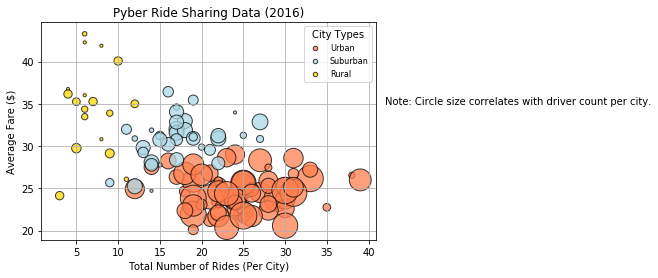

In [73]:
# Obtain the x and y coordinates for each of the three city types
urban_data = ride_city_data[ride_city_data["type"]== "Urban"].groupby([ride_city_data["city"]])
suburban_data = ride_city_data[ride_city_data["type"]== "Suburban"].groupby([ride_city_data["city"]])
rural_data = ride_city_data[ride_city_data["type"]== "Rural"].groupby([ride_city_data["city"]])

# Build the scatter plots for each city types
Urban_TotRidesCityX = urban_data["ride_id"].count() 
Suburban_TotRidesCityX = suburban_data["ride_id"].count()
Rural_TotRidesCityX = rural_data["ride_id"].count()

Urban_AvgFareCityY = urban_data["fare"].mean() 
Suburban_AvgFareCityY = suburban_data["fare"].mean()
Rural_AvgFareCityY = rural_data["fare"].mean()

Urban_DriverCntCityZ = urban_data["driver_count"].mean() 
Suburban_DriverCntCityZ = suburban_data["driver_count"].mean()
Rural_DriverCntCityZ = rural_data["driver_count"].mean()


plt.scatter(Urban_TotRidesCityX, Urban_AvgFareCityY, label = "Urban", s=Urban_DriverCntCityZ*10, color=["coral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(Suburban_TotRidesCityX, Suburban_AvgFareCityY, label = "Suburban", s=Suburban_DriverCntCityZ * 10, color=["lightblue"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(Rural_TotRidesCityX, Rural_AvgFareCityY, label = "Rural", s=Rural_DriverCntCityZ * 10, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
legend = plt.legend(fontsize=8, title = "City Types", loc="best")

legend.legendHandles[0]._sizes = [20]
legend.legendHandles[1]._sizes = [20]
legend.legendHandles[2]._sizes = [20]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("PyberRideSharingData.png", bbox_inches='tight')

# Show plot
plt.show()

## Total Fares by City Type

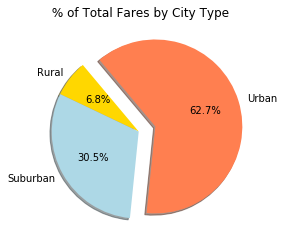

<Figure size 432x288 with 0 Axes>

In [80]:
# Calculate Type Percents
city_type = ride_city_data.groupby(['type'])
tot_fare = city_type['fare'].sum()

labels1 = ["Rural","Suburban","Urban"]
explode = (0,0,0.2)
colors = ["gold", "lightblue", "coral"]

# Build Pie Chart
plt.pie(tot_fare, explode = explode, labels = labels1, colors = colors, autopct ="%2.1f%%", shadow = True, startangle = 130)
plt.title(" % of Total Fares by City Type")
plt.show()

# Save Figure
plt.savefig("TotalFaresbyCityType.png")


## Total Rides by City Type

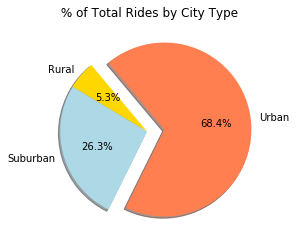

<Figure size 432x288 with 0 Axes>

In [81]:
# Calculate Type Percents

tot_rides = city_type['ride_id'].count()

labels2 = ["Rural","Suburban","Urban"]
explode = (0,0,0.2)
colors = ["gold", "lightblue", "coral"]

# Build Pie Chart
plt.pie(tot_rides, explode = explode, labels = labels2, colors = colors, autopct ="%2.1f%%", shadow = True, startangle = 130)
plt.title(" % of Total Rides by City Type")
plt.show()

# Save Figure
plt.savefig("TotalRidesbyCityType.png")


## Total Drivers by City Type

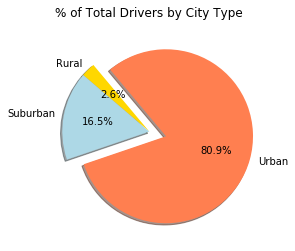

<Figure size 432x288 with 0 Axes>

In [82]:
# Calculate Driver Percents
drivers_citytype = city_data_to_load.groupby(['type'])
tot_drivers = drivers_citytype['driver_count'].sum()


labels3 = ["Rural","Suburban","Urban"]
explode = (0,0,0.2)
colors = ["gold", "lightblue", "coral"]

# Build Pie Charts
plt.pie(tot_drivers, explode=explode, labels=labels3, colors=colors,autopct="%2.1f%%", shadow=True, startangle=130)
plt.title("% of Total Drivers by City Type")

# Show Figure
plt.show()

# Save Figure
plt.savefig("TotalDriversbyCityType.png")




In [ ]:
#Urban areas have more Pyber presence than rural areas because of large population and lack or people driving due to traffic.
#More urban drivers imply more pyber rides which then result in more pyber revenue than suburban and rural areas
#From bubble plots, we can observe that rural areas have higher fares with less rides compared to urban areas that have lower fares and many more rides. 